# CASO 1  - Tolerancia al riesgo

*Caso tomado de: Tatsat, H., Puri, S., & Lookabaugh, B. (2020). Machine Learning and Data Science Blueprints for Finance. O'Reilly media.*

**Detalle del caso**

<p style="text-align: justify;">
La empresa de asesoramiento financiero AGUERRE S.A. se especializa en la gestión de portafolios de inversión de diversos clientes. Para optimizar las inversiones, evalúa el perfil de riesgo de cada cliente en función de sus ingresos, objetivos de inversión (ahorro, mantenimiento de valor, entre otros) y otros factores que permiten definir un portafolio acorde a sus necesidades.
Actualmente, el análisis manual del perfil de riesgo consume demasiado tiempo y se ha observado que existen patrones recurrentes en los perfiles de los clientes, aunque también se dan casos excepcionales. Generalmente, para determinado tipo de clientes con un nivel de riesgo similar, los asesores de la empresa han cumplido con las finalidades y las expectativas de rentabilidad de los clientes, optimizando mediante el modelo de Markowitz.
</p>
    
<p style="text-align: justify;">
Por este motivo, AGUERRE S.A. te ha contratado para ayudar a automatizar este análisis y, si es posible, desarrollar una aplicación que facilite la evaluación del perfil de riesgo de los clientes, y además permita encontrar fácilmente un portafolio óptimo.
</p>

<p style="text-align: justify;">
La empresa cuenta con una base de datos de clientes con cararacterísticas sociodemográficas, ingresos, entre otros. Los asesores de la empresa, luego de un minucioso estudio de cada inversor, y en función de su conocimiento avanzado en Finanzas, han establecido un índice de riesgo del mismo.
    
Revisando los metadatos de la empresa, encuentra que las variables con las que cuenta el dataset son:
* AGE07: La edad del inversor.
    
* EDCL07: El nivel de educación alcanzado, establecido mediante 4 categorías: <br>
        1 no terminó secundaria  <br>
        2 Secundaria terminada <br>
        3 Universidad incompleta <br>
        4 Universidad completa
* MARRIED07: estado conyugal, 1 si está casado, 2 si no está casado. 
* KIDS07: Número de hijos del inversor.
* OCCAT107: La categoría de ocupación de la persona: <br>
        1 gerencial/professional  <br>
        2 tecnico/ventas/servicios <br>
        3 otras (producción, operadores, artesanos, obreros) <br>
        4 no están trabajando (desempleados o jubilados)
* INCOME07: ingresos anuales en dólares     
* RISK07: es la voluntad expresada a tomar riesgo por la persona. Va de 1 a 4, siendo 1 la mayor voluntad a tomar riesgo.
* NETWORTH07: es el valor en dólares del patrimonio neto de la persona.
* TrueRiskTol: Es la verdadera tolerancia al riesgo definida por los asesores de la empresa, tomando en cuenta la capacidad económica y financiera, objetivos de la inversión, entre otros factores. Es un índice que va del 1 al 100,   

</p>

## 1) Entender el negocio

## 2) Delimitación del problema de negocio

Es una empresa especializada en inversiones, que aconseja a sus clientes en qué deben invertir. La empresa debe seleccionar cuidadosamente el portafolio óptimo que satisfaga su finalidad, y obtener la mayor rentabilidad dado el riesgo que está dispuesto a asumir el cliente (a mayor rentabilidad, mayor el riesgo).

La empresa establece que quiere disminuir los tiempos de análisis del perfil de riesgo., por lo que parecería correcto que pretenda automatizarlo, siempre que ello sea posible y que dicha automatización sea confiable. Como la empresa ya tiene una base de datos de clientes con diversas características, y además cuenta con una variable referente a la tolerancia al riesgo por el cliente, y es determinada por expertos de la empresa, entonces es posible realizar modelos de machine learning supervisado para automatizar el análisis del perfil de riesgo de nuevos clientes. Un supuesto fuerte de hacer esto, es que damos por bueno el análisis que hicieron los asesores de la empresa. 


## 3) Análisis del set de datos

## 4) Limpieza del dataset

In [648]:
# primero cargo las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
#sacar notación científica de numpy
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})

#sacar notación científica de pandas
pd.set_option('display.float_format', '{:0.5f}'.format)

In [652]:
#Cargo el set de datos
df = pd.read_csv('data_investors.csv',index_col=0)

In [654]:
#veo los primeros 5 registros
df.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
0,47,2,1,0,1,56443.74418,3,352641.71130,6.94744
1,47,2,1,0,1,56443.74418,3,340525.21881,6.22316
2,47,2,1,0,1,56443.74418,3,348696.08426,6.67671
3,47,2,1,0,1,56443.74418,3,351802.87720,6.28685
4,47,2,1,0,1,56443.74418,3,358958.85696,6.17702


Cada fila es un inversor distinto, y las columnas son características sociodemográficas y económicas del mismo. 

In [657]:
df.RISK07.value_counts()

RISK07
3    2348
2    1223
4     966
1     273
Name: count, dtype: int64

In [659]:
#tamaño
df.shape

(4810, 9)

In [661]:
#info general
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4810 entries, 0 to 19284
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE07        4810 non-null   int64  
 1   EDCL07       4810 non-null   int64  
 2   MARRIED07    4810 non-null   int64  
 3   KIDS07       4810 non-null   int64  
 4   OCCAT107     4810 non-null   int64  
 5   INCOME07     4810 non-null   float64
 6   RISK07       4810 non-null   int64  
 7   NETWORTH07   4810 non-null   float64
 8   TrueRiskTol  4810 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 375.8 KB


In [663]:
#me fijo si hay duplicados en términos de TODAS las variables
df.duplicated().sum()

436

In [665]:
#Ojo! una cosa es duplicado en términos de todas las variables, y otra en término de una
df.duplicated('AGE07').sum()

4741

In [667]:
#Obviamente muchas edades se repiten y eso está bien
df['AGE07'].value_counts()

AGE07
59    175
55    170
61    154
48    149
64    144
     ... 
88      9
89      6
94      5
25      3
22      1
Name: count, Length: 69, dtype: int64

In [669]:
#borramos duplicados
df = df.drop_duplicates()
#chequeo el tamaño
df.shape

(4374, 9)

In [671]:
#me fijo estadísticos de  variables numéricas
df.describe()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
count,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000
mean,55.69502,3.32053,1.20416,0.77572,1.70759,1259437.13411,2.82556,19968314.79633,10.49630
std,13.39002,0.95432,0.40313,1.10225,0.82370,5222192.88609,0.81039,85279299.92129,15.47790
min,22.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,-5633236.96900,0.45011
25%,46.00000,2.00000,1.00000,0.00000,1.00000,64963.55462,2.00000,222715.63031,1.02703
50%,56.00000,4.00000,1.00000,0.00000,1.00000,117147.39358,3.00000,732115.75768,3.94780
75%,65.00000,4.00000,1.00000,1.00000,2.00000,362890.67603,3.00000,5063399.36313,13.11157
max,95.00000,4.00000,2.00000,7.00000,4.00000,68382128.56300,4.00000,1451955540.80000,98.60433


In [673]:
#me fijo si hay missings
nan_counts = df.isna().sum()
nan_counts

AGE07          0
EDCL07         0
MARRIED07      0
KIDS07         0
OCCAT107       0
INCOME07       0
RISK07         0
NETWORTH07     0
TrueRiskTol    0
dtype: int64

In [ ]:
0.2e9

200000000.0

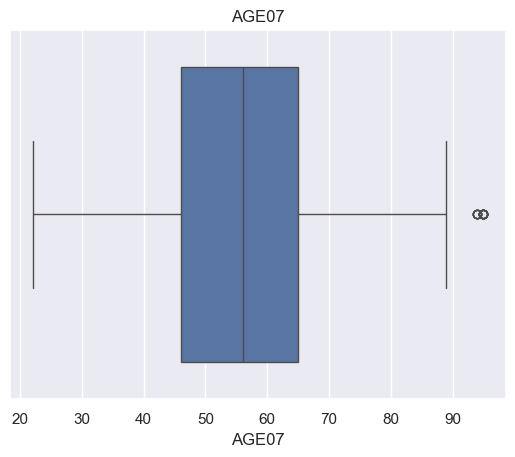

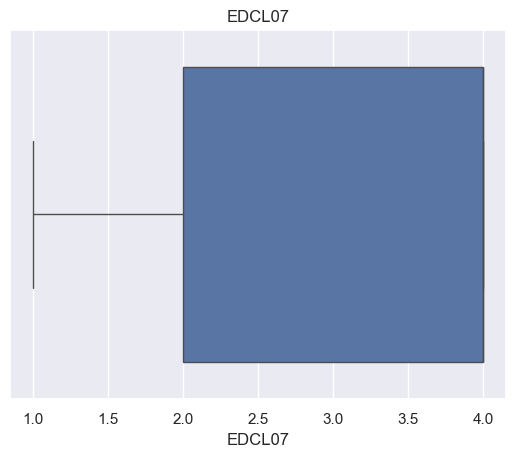

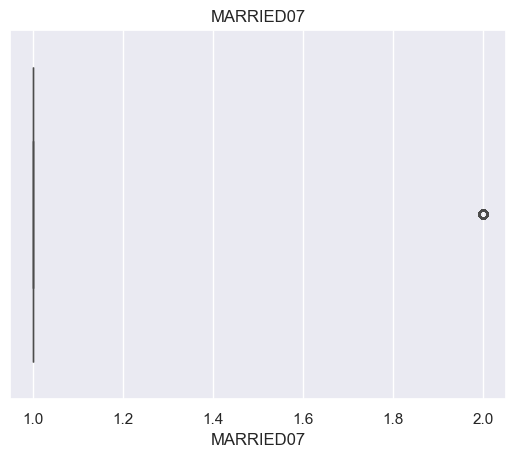

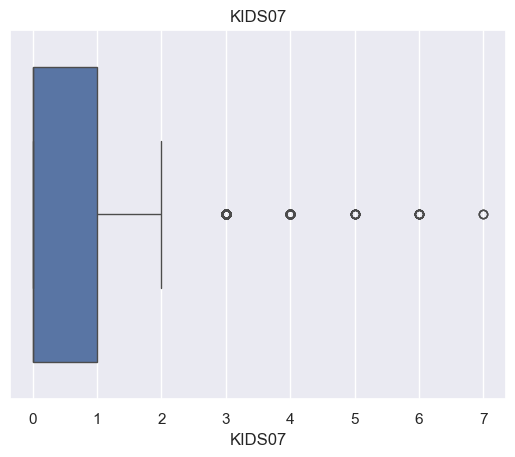

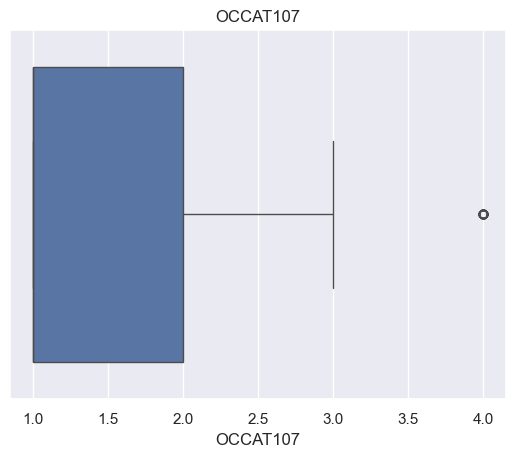

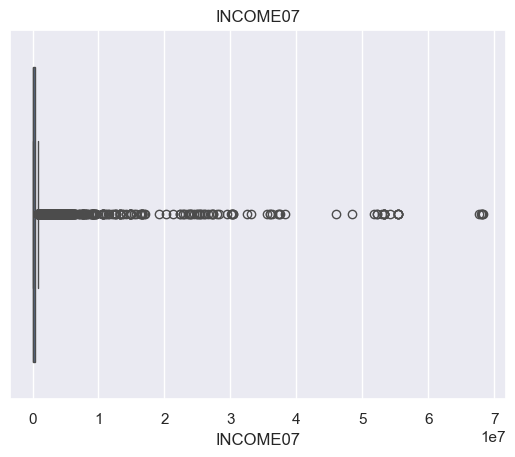

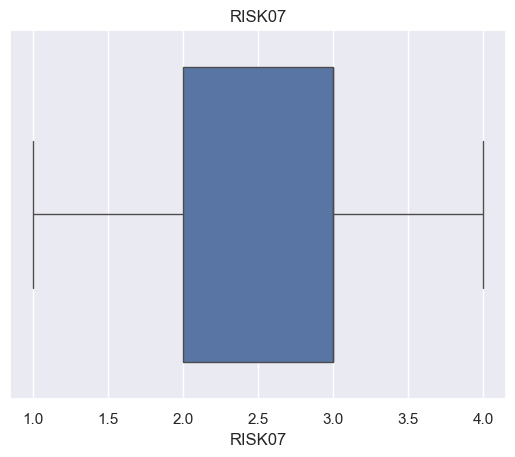

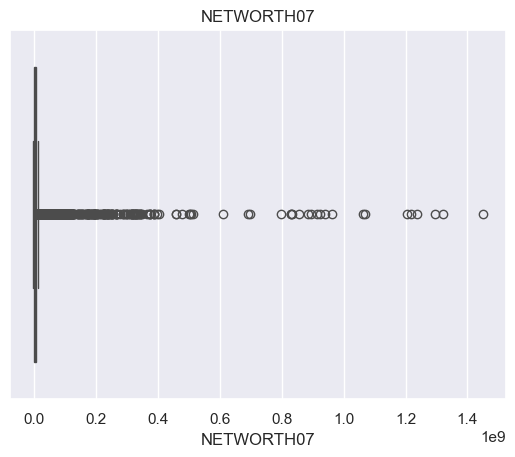

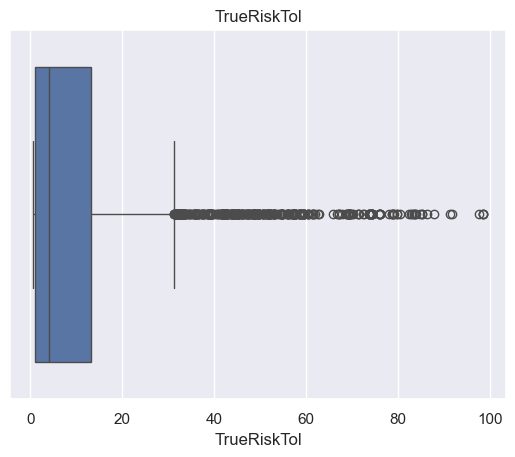

In [677]:
# me fijo outliers en términos de cada variable por medio de boxplots
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [679]:
#vemos gente con más de 10 millones de dólares en ingresos
print("Gente con ingresos superiores a 10 millones")
print((df['INCOME07'] > 10000000).value_counts())

print()
#vemos gente con más de 200 millones de patrimonio neto
print("Gente con patrimonio neto superior a 20 millones")
print((df['NETWORTH07'] > 200000000).value_counts())

Gente con ingresos superiores a 10 millones
INCOME07
False    4263
True      111
Name: count, dtype: int64

Gente con patrimonio neto superior a 20 millones
NETWORTH07
False    4267
True      107
Name: count, dtype: int64


Hay gente con ingresos superiores a 10 millones dé dólares, y gente con un patrimonio neto de más de 200 millones de dólares. La empresa va a tener diferentes segmentos de clientes, tiene clientes de clase media que quieren ahorrar, pero también van a buscar inversores grandes que les reportan mucha rentabilidad. A mayor nivel de ingreso y patrimonio neto, hay mayor propensión a invertir, por lo tanto no conviene remover los outliers porque esos clientes con altos ingresos y patrimonio estarán siempre presentes (por lo menos la empresa intentará eso). Probablemente estas personas, tengan también mayor propensión al riesgo, por lo que tampoco conviene quitar los outliers en tolerancia al riesgo. De todas maneras seguiremos viendo esto en el E

Podemos probar también un isolation forest

In [681]:
#cargamos librería
from sklearn.ensemble import IsolationForest

In [683]:
# Configurar y entrenar el Isolation Forest
#elijo solo variables predictoras, 
X = df.drop(['TrueRiskTol'],axis=1)

#recordar que no tengo que separar en training y test, ya que isolation forest es ML no supervisado
isolation_forest = IsolationForest(random_state=42)

#hago tanto el fit como el predict sobre todos los datos
outliers = isolation_forest.fit_predict(X)

# Añadir la predicción de outliers al dataset con variables predictoras
df['is_outlier'] = outliers

In [685]:
df

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol,is_outlier
0,47,2,1,0,1,56443.74418,3,352641.71130,6.94744,1
1,47,2,1,0,1,56443.74418,3,340525.21881,6.22316,1
2,47,2,1,0,1,56443.74418,3,348696.08426,6.67671,1
3,47,2,1,0,1,56443.74418,3,351802.87720,6.28685,1
4,47,2,1,0,1,56443.74418,3,358958.85696,6.17702,1
...,...,...,...,...,...,...,...,...,...,...
19278,39,4,1,7,1,152291.61166,3,1617396.40760,10.66479,1
19280,50,4,2,0,2,78808.24659,2,653876.35532,5.97883,1
19281,50,4,2,0,2,78808.24659,2,655843.99086,5.94175,1
19282,50,4,2,0,2,77743.27029,2,654911.95297,5.90346,1


In [687]:
#Le pongo normal si es 1, y outlier si es -1
df['is_outlier'] = df['is_outlier'].map({-1: 'Outlier',1:'Normal'})

In [689]:
df['is_outlier'].value_counts()/len(df)

is_outlier
Normal    0.83356
Outlier   0.16644
Name: count, dtype: float64

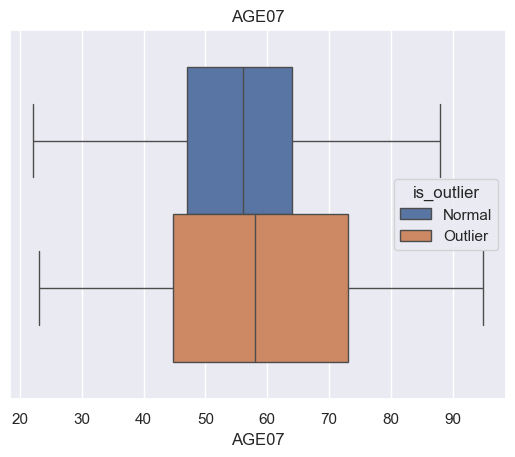

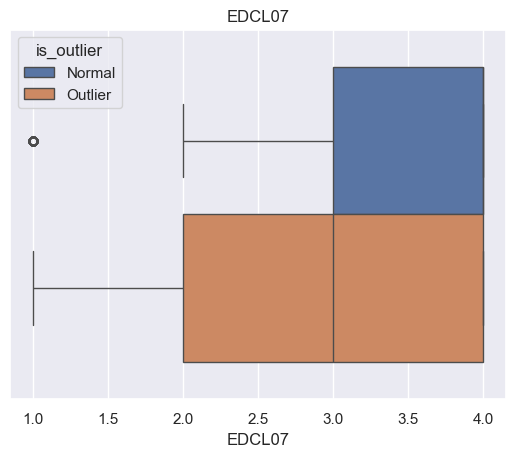

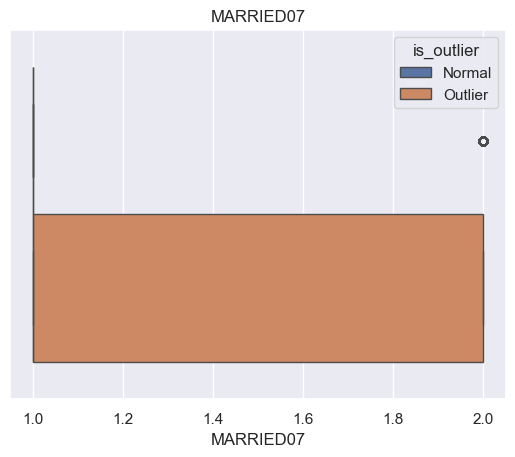

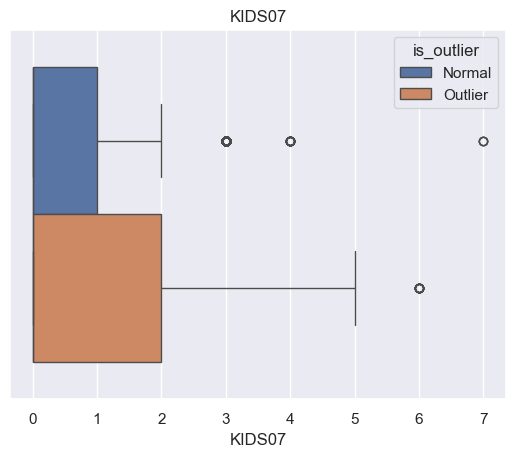

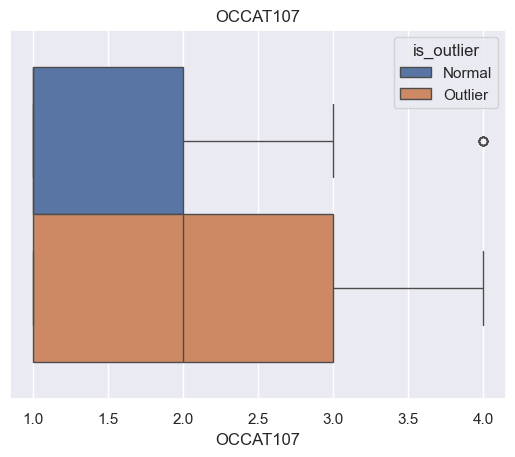

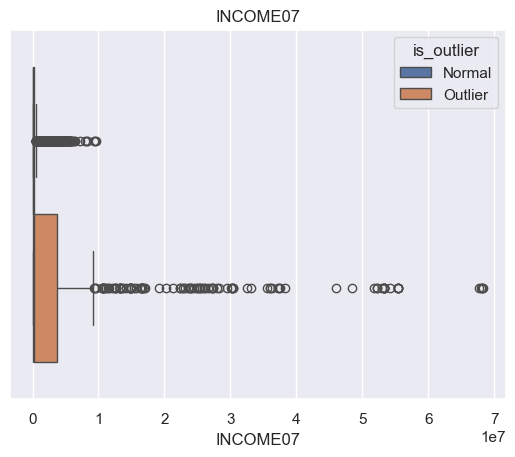

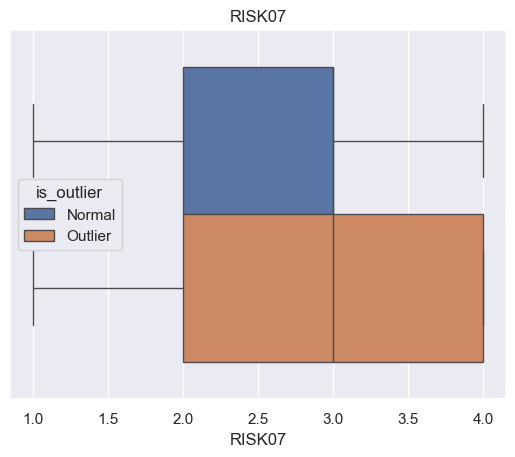

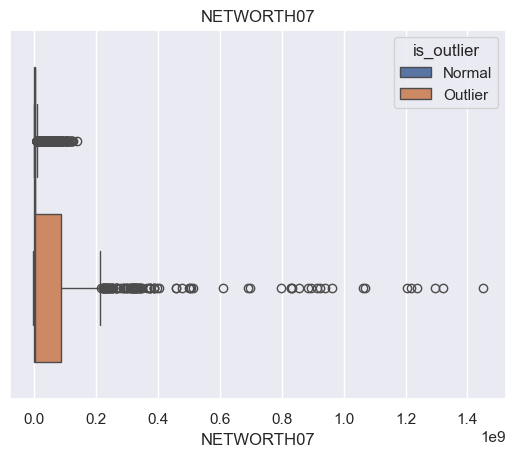

In [691]:
# me fijo outliers en términos de cada variable por medio de boxplots
for i in df.drop(['is_outlier','TrueRiskTol'],axis=1).columns:
    sns.boxplot(data=df,x=i,hue='is_outlier')
    plt.title(i)
    plt.show()

In [692]:
#borro objetos que ya no sirven
del([X,nan_counts,isolation_forest,i,outliers])

La calidad del dataset parece ser buena, no hay missing, los outliers parecen coherentes y no habría que eliminarlos, borramos duplicados en términos de todas las variables, así que podemos seguir con el análisis del dataset.

## 5) Análisis Exploratorio de Datos (EDA)

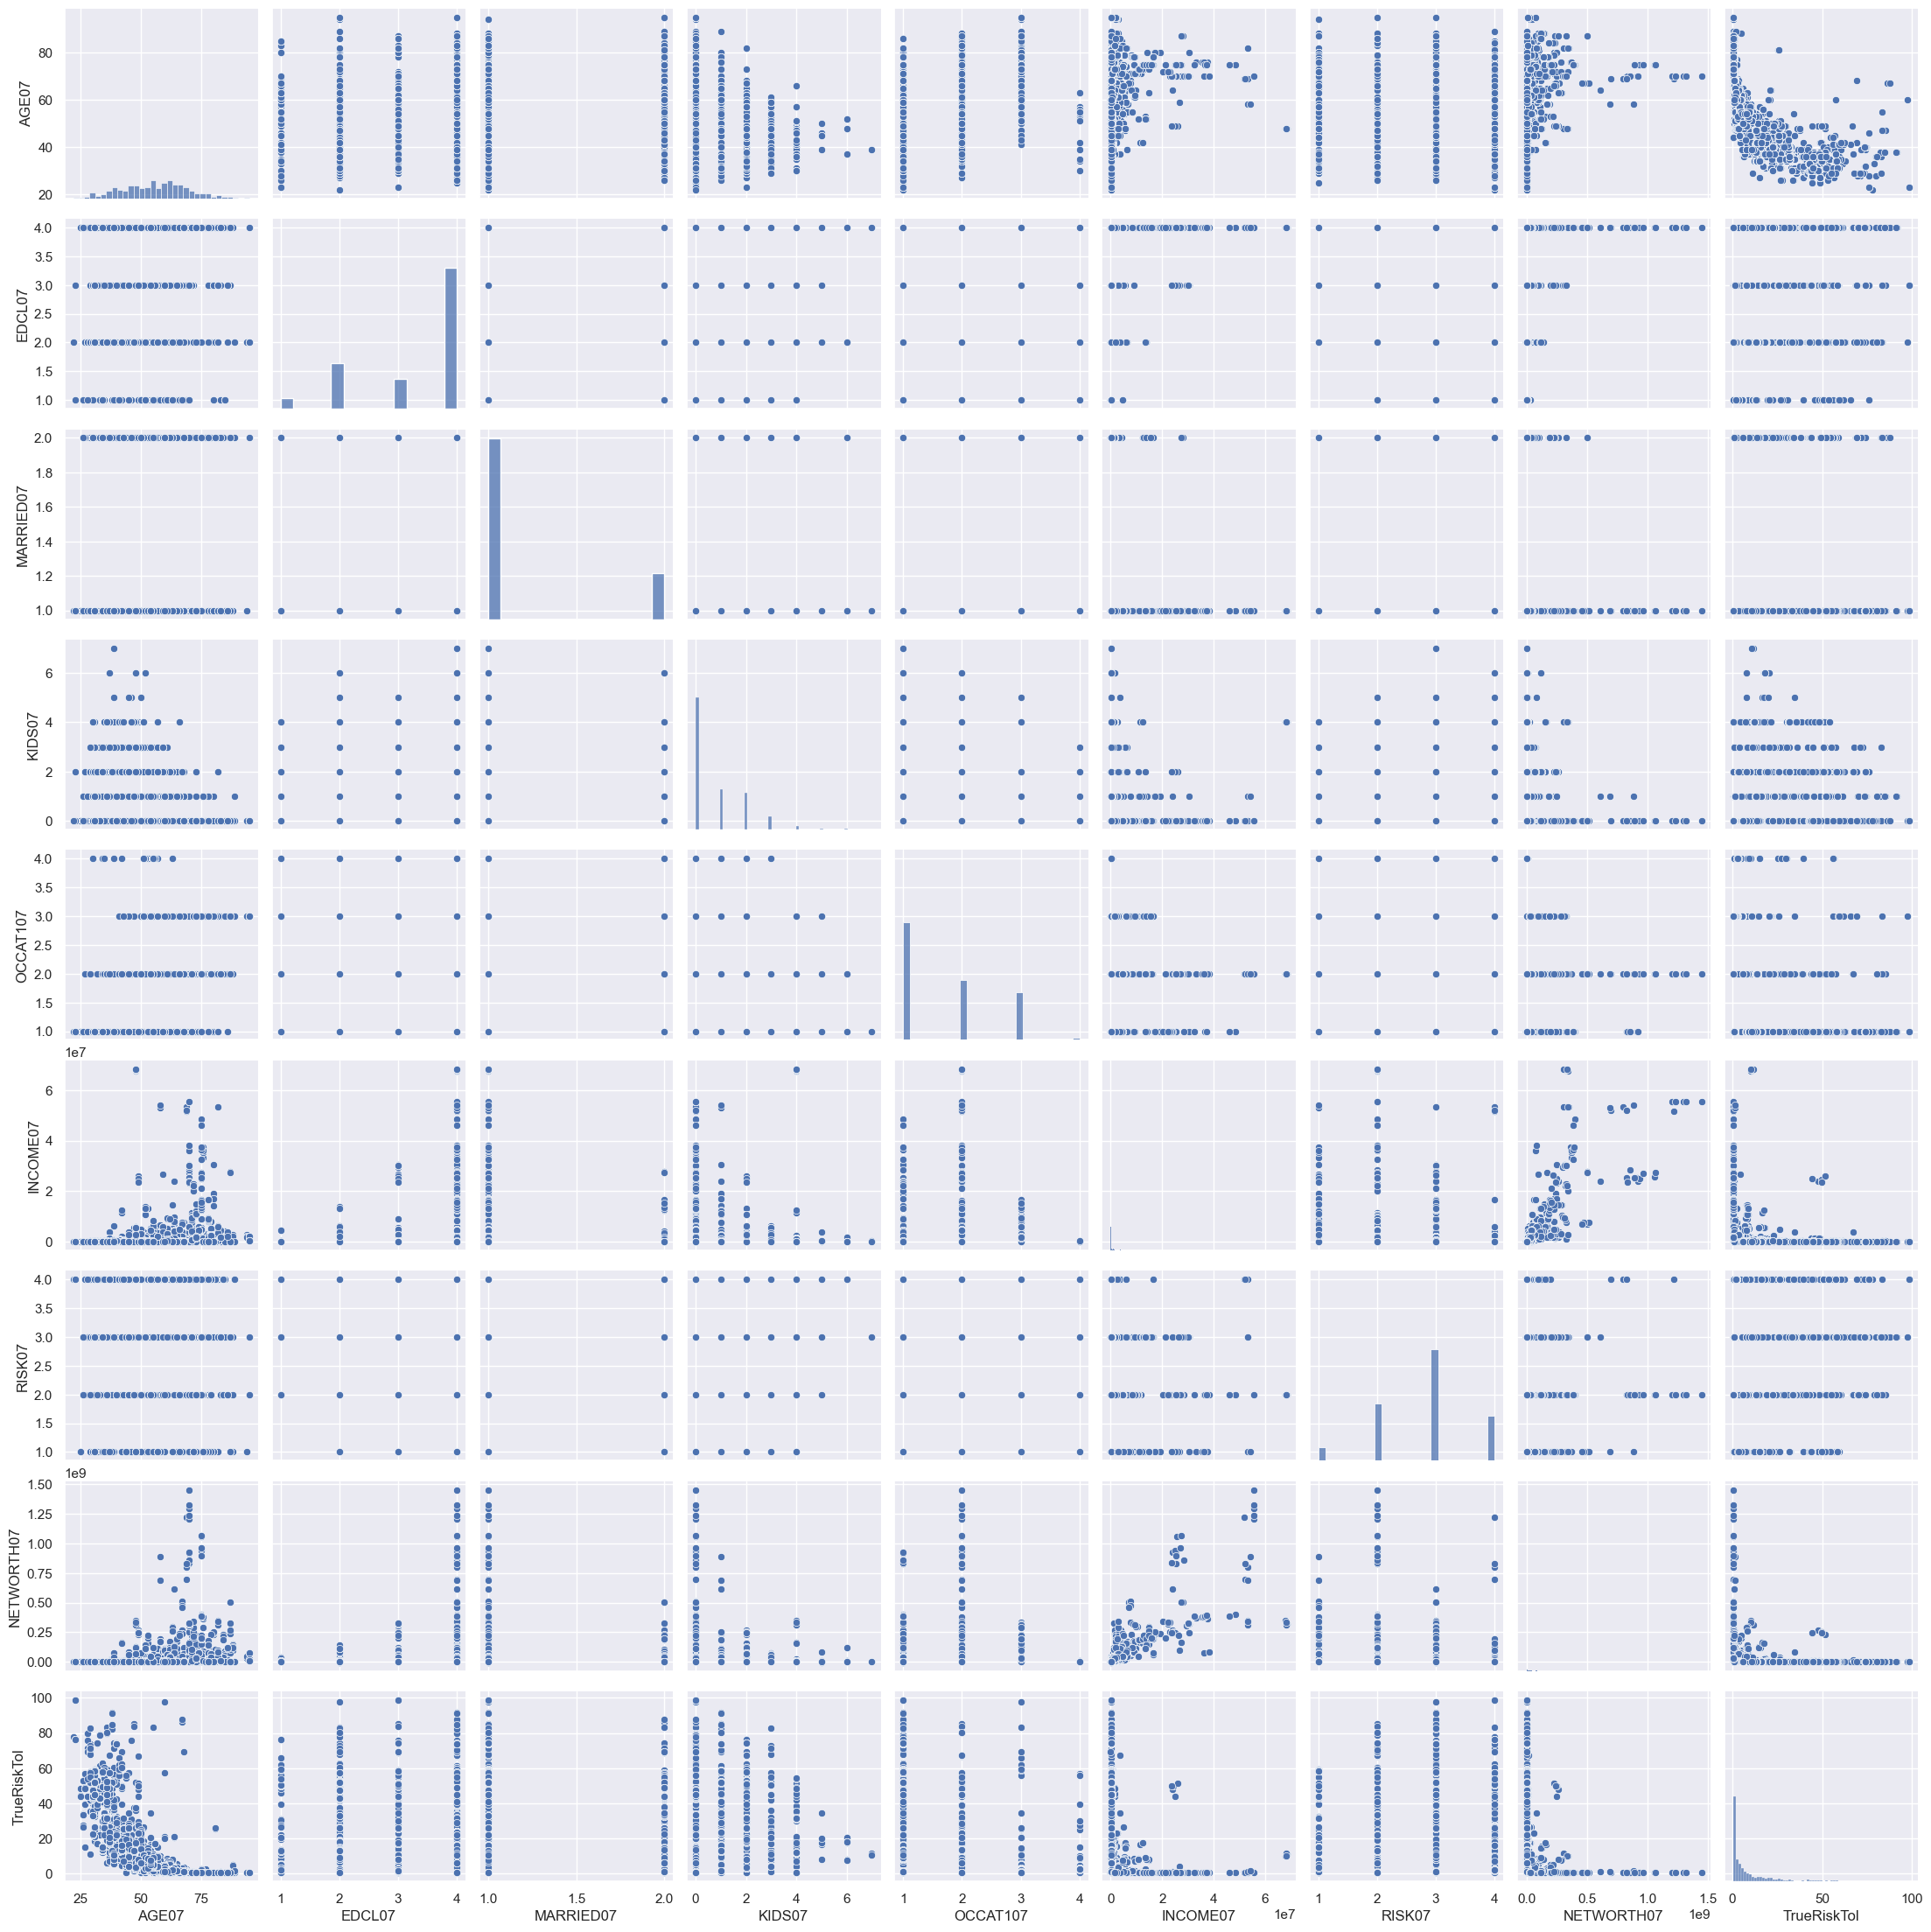

In [515]:
#nos fijamos scatterploy y gráficos de barra e histogramas de todas las variables
sns.pairplot(df)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


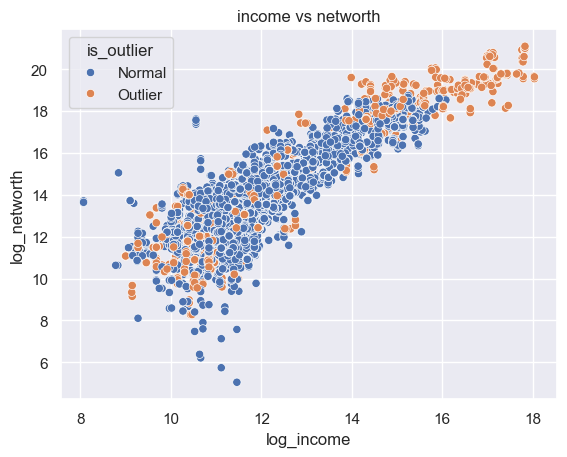

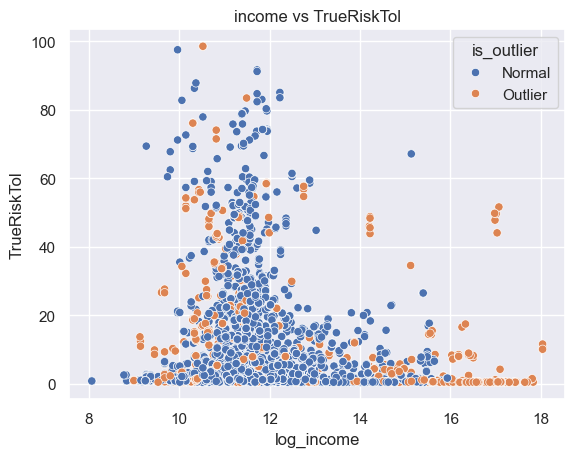

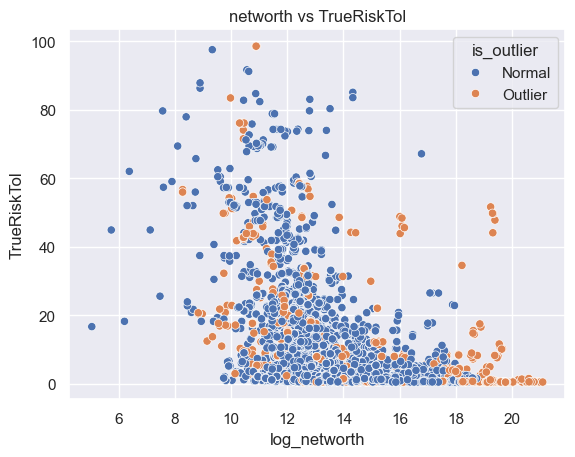

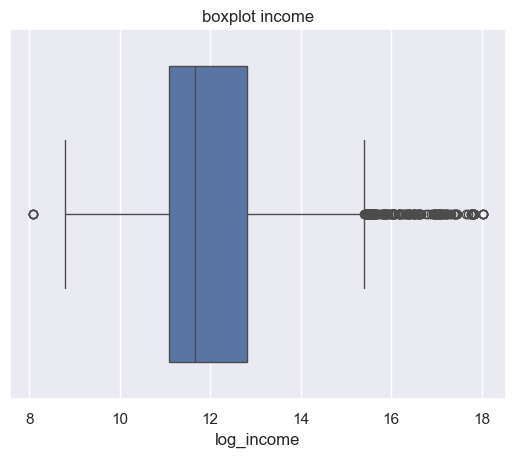

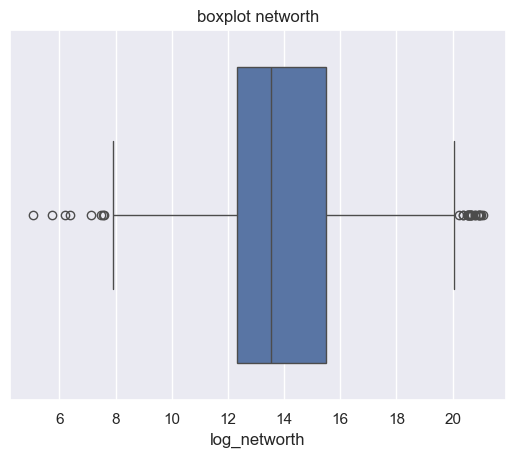

In [695]:
#para analizar mejor el ingreso y el patrimonio neto, podemos hacer una transformación logarítmica
df['log_income']= np.log(df['INCOME07'])
df['log_networth']= np.log(df['NETWORTH07'])

#hago diversos gráficos


sns.scatterplot(data=df,x='log_income',y='log_networth',hue='is_outlier')
plt.title('income vs networth')
plt.show()


sns.scatterplot(data=df,x='log_income',y='TrueRiskTol',hue='is_outlier')
plt.title('income vs TrueRiskTol')
plt.show()


sns.scatterplot(data=df,x='log_networth',y='TrueRiskTol',hue='is_outlier')
plt.title('networth vs TrueRiskTol')
plt.show()

sns.boxplot(data=df,x='log_income')
plt.title('boxplot income')
plt.show()


sns.boxplot(data=df,x='log_networth')
plt.title('boxplot networth')
plt.show()


In [697]:
#borramos las variables outlier y logaritmos
df = df.drop(['is_outlier','log_income','log_networth'],axis=1)

Podemos ver un análisis multivariado de todas las variables mediante un heatmap

<Axes: >

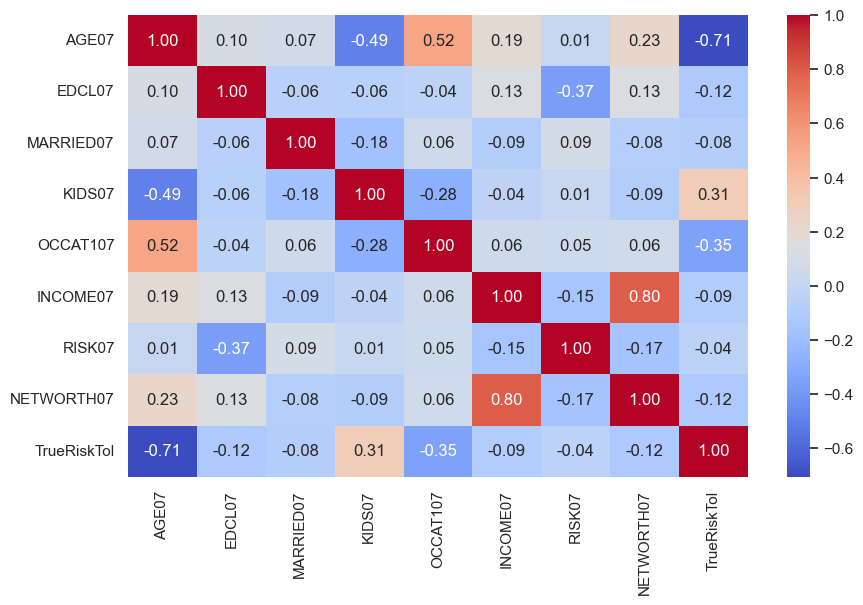

In [700]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f",annot=True)

## 6) Técnicas de machine learning a usar

Tenemos que predecir la variable TrueRiskTol, por lo tanto tenemos una variable target, y estamos ante un problema de Machine Learning Supervisado. Al ser TrueRiskTol una variable numérica, entonces es un problema de regresión.

Probaremos los siguientes métodos: regresión lineal, Lasso, Ridge,  SVM, KNN, decision tree, random forest, gradient boosting y XGBoost. A veces para ver que modelo usar, podemos ver que han hecho o investigado otros. Por ejemplo: https://arxiv.org/pdf/2311.04164

Al ser un problema de regresión, trataremos de minimizar el error. Como estamos prediciendo la tolerancia al riesgo, y en función de ello vamos a decidir que inversiones realizar lo cual puede llevar a que si hay un error alto invertir en algo más riesgoso que lo que la persona está dispuesto a aceptar (con lo cual podría llegar a perder mucho dinero), nos conviene usar el RMSE, ya que castiga más a las predicciones que se alejan del valor real. Por lo tanto, vamos a elegir aquellos hiperparámetros y modelos que tengan menor RMSE.

## 7) Feature engineering

Tenemos 3 variables que en realidad son categorías:MARRIED07, EDCL07 y  OCCAT107. Vamos a pasarlas a categoría.

EDCL07: El nivel de educación alcanzado, establecido mediante 4 categorías:<br>
1 no terminó secundaria <br>
2 Secundaria terminada<br>
3 Universidad incompleta<br>
4 Universidad completa<br>

MARRIED07: estado conyugal:<br>
1 si está casado<br>
2 si no está casado<br>


OCCAT107: La categoría de ocupación de la persona:<br>
1 gerencial/professional <br>
2 tecnico/ventas/servicios<br>
3 otras (producción, operadores, artesanos, obreros)<br>
4 no están trabajando (desempleados o jubilados)<br>

MARRIED07

In [704]:
#hacemos el conteo para asegurarnos que hacemos bien la transformación
df['MARRIED07'].value_counts()

MARRIED07
1    3481
2     893
Name: count, dtype: int64

In [706]:
df['MARRIED07'] = df['MARRIED07'].map({1: 'casado',2:'no casado'})

In [708]:
df['MARRIED07'].value_counts()

MARRIED07
casado       3481
no casado     893
Name: count, dtype: int64

EDCL07

In [711]:
df['EDCL07'].value_counts()

EDCL07
4    2707
2     885
3     572
1     210
Name: count, dtype: int64

In [713]:
df['EDCL07'] = df['EDCL07'].map(
                                {
                                    1: 'no terminó secundaria',
                                    2:'Secundaria terminada',
                                    3:'Universidad incompleta',
                                    4: 'Universidad completa'
                                }
)

In [715]:
df['EDCL07'].value_counts()

EDCL07
Universidad completa      2707
Secundaria terminada       885
Universidad incompleta     572
no terminó secundaria      210
Name: count, dtype: int64

OCCAT107

In [718]:
df['OCCAT107'].value_counts()

OCCAT107
1    2271
2    1150
3     914
4      39
Name: count, dtype: int64

In [720]:
df['OCCAT107'] = df['OCCAT107'].map(
                                {
                                    1: 'gerencial/profesional',
                                    2:'tecnico/ventas/servicios',
                                    3:'otras (producción, operadores, artesanos, obreros)',
                                    4: 'no están trabajando (desempleados o jubilados)'
                                }
)

In [722]:
df['OCCAT107'].value_counts()

OCCAT107
gerencial/profesional                                 2271
tecnico/ventas/servicios                              1150
otras (producción, operadores, artesanos, obreros)     914
no están trabajando (desempleados o jubilados)          39
Name: count, dtype: int64

Empezamos a dividir en train/test, ya que algunas de las transformaciones las haremos sobre esos datasets y no sobr el dataset original

In [725]:
df

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
0,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,352641.71130,6.94744
1,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,340525.21881,6.22316
2,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,348696.08426,6.67671
3,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,351802.87720,6.28685
4,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,358958.85696,6.17702
...,...,...,...,...,...,...,...,...,...
19278,39,Universidad completa,casado,7,gerencial/profesional,152291.61166,3,1617396.40760,10.66479
19280,50,Universidad completa,no casado,0,tecnico/ventas/servicios,78808.24659,2,653876.35532,5.97883
19281,50,Universidad completa,no casado,0,tecnico/ventas/servicios,78808.24659,2,655843.99086,5.94175
19282,50,Universidad completa,no casado,0,tecnico/ventas/servicios,77743.27029,2,654911.95297,5.90346


In [727]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.preprocessing import MinMaxScaler


In [729]:
#primero divido en predictores y target
X = df.drop("TrueRiskTol",axis=1)
y = df["TrueRiskTol"]

Creo variables dummy

In [732]:
#voy a hacerlo solo sobre las variables categóricas, las miro
var_cat = X.select_dtypes(include='O')
var_cat

,EDCL07,MARRIED07,OCCAT107
0,Secundaria terminada,casado,gerencial/profesional
1,Secundaria terminada,casado,gerencial/profesional
2,Secundaria terminada,casado,gerencial/profesional
3,Secundaria terminada,casado,gerencial/profesional
4,Secundaria terminada,casado,gerencial/profesional
...,...,...,...
19278,Universidad completa,casado,gerencial/profesional
19280,Universidad completa,no casado,tecnico/ventas/servicios
19281,Universidad completa,no casado,tecnico/ventas/servicios
19282,Universidad completa,no casado,tecnico/ventas/servicios


In [736]:
#Creo variables dummy de las 3 variables categóricas
X_cat = pd.get_dummies(var_cat,drop_first=True)
X_cat

,EDCL07_Universidad completa,EDCL07_Universidad incompleta,EDCL07_no terminó secundaria,MARRIED07_no casado,OCCAT107_no están trabajando (desempleados o jubilados),"OCCAT107_otras (producción, operadores, artesanos, obreros)",OCCAT107_tecnico/ventas/servicios
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19278,True,False,False,False,False,False,False
19280,True,False,False,True,False,False,True
19281,True,False,False,True,False,False,True
19282,True,False,False,True,False,False,True


In [748]:
#lo agrego al df y borro las variables categóricas
#elimino las variables categóricas
X = X.select_dtypes(exclude='O')
#agrego las dummies que la sustituyen
X= pd.concat([X,X_cat],axis=1)

X

,AGE07,KIDS07,INCOME07,RISK07,NETWORTH07,EDCL07_Universidad completa,EDCL07_Universidad incompleta,EDCL07_no terminó secundaria,MARRIED07_no casado,OCCAT107_no están trabajando (desempleados o jubilados),"OCCAT107_otras (producción, operadores, artesanos, obreros)",OCCAT107_tecnico/ventas/servicios
0,47,0,56443.74418,3,352641.71130,False,False,False,False,False,False,False
1,47,0,56443.74418,3,340525.21881,False,False,False,False,False,False,False
2,47,0,56443.74418,3,348696.08426,False,False,False,False,False,False,False
3,47,0,56443.74418,3,351802.87720,False,False,False,False,False,False,False
4,47,0,56443.74418,3,358958.85696,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19278,39,7,152291.61166,3,1617396.40760,True,False,False,False,False,False,False
19280,50,0,78808.24659,2,653876.35532,True,False,False,True,False,False,True
19281,50,0,78808.24659,2,655843.99086,True,False,False,True,False,False,True
19282,50,0,77743.27029,2,654911.95297,True,False,False,True,False,False,True


In [755]:
#borro lo que no preciso
del(var_cat,X_cat)

Paso a hacer el split entre train y test

In [762]:
from sklearn.model_selection import train_test_split

In [813]:
#Hago split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tengo que escalar los datos. Uso Min_max_scaler

In [816]:
from sklearn.preprocessing import MinMaxScaler

In [818]:
min_max_scaler = MinMaxScaler()

X_train_scaled= min_max_scaler.fit_transform(X_train)
X_test_scaled= min_max_scaler.transform(X_test)

#no hay peoblema en usar minxmaxscaler con dummies porque ya están entre 0 y 1

X_train_scaled

array([[0.28767, 0.28571, 0.00331, ..., 0.00000, 0.00000, 1.00000],
       [0.16438, 0.28571, 0.00062, ..., 0.00000, 0.00000, 0.00000],
       [0.35616, 0.14286, 0.00432, ..., 0.00000, 0.00000, 0.00000],
       ...,
       [0.61644, 0.00000, 0.00161, ..., 0.00000, 1.00000, 0.00000],
       [0.36986, 0.42857, 0.00229, ..., 0.00000, 0.00000, 0.00000],
       [0.69863, 0.00000, 0.00208, ..., 0.00000, 1.00000, 0.00000]])

In [820]:
#paso ambos a dataframe
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,index=X_test.index)

In [828]:
X_train_scaled

,AGE07,KIDS07,INCOME07,RISK07,NETWORTH07,EDCL07_Universidad completa,EDCL07_Universidad incompleta,EDCL07_no terminó secundaria,MARRIED07_no casado,OCCAT107_no están trabajando (desempleados o jubilados),"OCCAT107_otras (producción, operadores, artesanos, obreros)",OCCAT107_tecnico/ventas/servicios
7268,0.28767,0.28571,0.00331,0.33333,0.00070,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
17998,0.16438,0.28571,0.00062,0.00000,0.00024,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
18154,0.35616,0.14286,0.00432,0.33333,0.00155,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7441,0.45205,0.14286,0.00144,1.00000,0.00014,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
7815,0.17808,0.14286,0.00119,0.66667,0.00015,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
15631,0.76712,0.00000,0.24295,1.00000,0.04687,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1930,0.53425,0.00000,0.00172,1.00000,0.00061,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
14183,0.61644,0.00000,0.00161,0.66667,0.00293,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
16929,0.36986,0.42857,0.00229,0.66667,0.00031,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Estamos en condiciones de empezar a aplicar modelos

## 8) Determinación de hiperparámetros y análisis de modelos

In [942]:
#cargo librerías
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge

### Regresión lineal

In [832]:
#Empiezo con regresión lineal usando SM

#hago un X_train aparte porque para sm tengo que agregar la constante
X_train_sm = sm.add_constant(X_train_scaled)

In [840]:
#establezco el modelo y hago el fit
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

In [846]:
#nos fijamos el resultado del modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TrueRiskTol   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     269.4
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:26:23   Log-Likelihood:                -11666.
No. Observations:                3061   AIC:                         2.336e+04
Df Residuals:                    3048   BIC:                         2.344e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          43.7215      0.990     44.177      0.000      41.781      45.662
AGE07                                                         -64.2248      1.470    -43.703      0.000     -67.106     -61.343
KIDS07                                                         -4.4706      1.463     -3.057      0.002      -7.338      -1.603
INCOME07                                                        9.7782      4.266      2.292      0.022       1.414      18.142
RISK07                                                         -3.0209      0.806     -3.746      0.000      -4.602      -1.440
NETWORTH07                                                      4.8965      5.733      0.854      0.393      -6.344      16.137
EDCL07_Universidad completa                                    -2.1731      0.544     -3.991      0.000      -3.241      -1.106
EDCL07_Universidad incompleta                                   0.9604      0.727      1.321      0.187      -0.465       2.386
EDCL07_no terminó secundaria                                    0.0897      0.995      0.090      0.928      -1.862       2.041
MARRIED07_no casado                                            -1.9082      0.511     -3.731      0.000      -2.911      -0.905
OCCAT107_no están trabajando (desempleados o jubilados)        -0.4325      2.072     -0.209      0.835      -4.495       3.630
OCCAT107_otras (producción, operadores, artesanos, obreros)     2.5712      0.620      4.144      0.000       1.355       3.788
OCCAT107_tecnico/ventas/servicios                              -1.5688      0.508     -3.089      0.002      -2.565      -0.573
==============================================================================
Omnibus:                     1678.679   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15651.351
Skew:                           2.456   Prob(JB):                         0.00
Kurtosis:                      12.929   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Llama la atencion que el beta de  networth no sea significativamente distinto de 0. Quizás haya multicolinealidad por la fuerte correlación con el ingreso.

Vemos abajo que hay un cuadro con varios números, vamos a ver 2: Durbin-Watson y Jarque Bera.

El indicador Durbin-Watson analiza la autocorrelación de los residuos de la regresión. La no autocorrelación de residuos es un supuesto de la regresión lineal.<br>
Valor cercano a 2: Indica que no hay autocorrelación en los residuos. Este es el valor ideal en un modelo bien ajustado, ya que sugiere independencia en los errores.<br>
Valor menor a 2: Indica autocorrelación positiva. Los errores tienden a estar correlacionados de forma directa.<br>
Valor mayor a 2: Indica autocorrelación negativa. Aquí, los errores tienden a estar correlacionados de forma inversa<br>
En este caso es 2, así que no hay autocorrelación de residuos.

Jarque-Bera analiza la normalidad de los residuos, otro supuesto de la regresión. Se interpreta así:<br>
p-valor mayor al nivel de significación (alfa )elegido (ejemplo 5%): no se puede concluir que los residuos no son normales.<br>
p-valor menor (por ejemplo, < 0.05): los residuos no se distribuyen normalmente.<br>
En este caso es más bajo que un al alfa del 5%, entonces los errores no se distribuyen en forma normal.

También se puede analizar la multicolinealidad y la heterocedasticidad. Para multicolinealidad uso el VIF, y para la heterocedasticidad el test Breusch Pagan.

Calculo el VIF, en el caso del VIF, un VIF superior a 5 indica la presencia de multicolinealidad entre esa variable y otras variables predictoras.

In [897]:
#calculo el VIF
vals = []

#empiezo en 1 porque en 0 tengo la constante
for i in range(1, X_train_sm.values.shape[1]):
    vals.append(VIF(X_train_sm.values, i))

pd.DataFrame({'vars':X_train_sm.drop('const',axis=1).columns,'VIF':vals})

,vars,VIF
0,AGE07,1.84967
1,KIDS07,1.39074
2,INCOME07,2.68037
3,RISK07,1.20276
4,NETWORTH07,2.72258
5,EDCL07_Universidad completa,1.77265
6,EDCL07_Universidad incompleta,1.47791
7,EDCL07_no terminó secundaria,1.19832
8,MARRIED07_no casado,1.08406
9,OCCAT107_no están trabajando (desempleados o j...,1.02641


No hay multicolinealidad, por lo que se cumple el supuesto para la regresión lineal.

Para analizar heterocedasticidad, uso Breusch Pagan.  Se interpreta así (con un alfa del 5%):<br>
p-valor < 0.05: se recha la hipótesis nula (H₀) de homocedasticidad, sugiriendo que hay heterocedasticidad.<br>
p-valor ≥ 0.05:  sugiere que no hay heterocedasticidad

In [881]:
#residuos
residuos = results.resid


# Realiza la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, results.model.exog)
bp_test_result = dict(zip(['LM Statistic', 'LM Test p-value', 'F Statistic', 'F Test p-value'], bp_test))

print(bp_test_result)

{'LM Statistic': 170.6392346738282, 'LM Test p-value': 3.5328369256972425e-30, 'F Statistic': 14.995486420623779, 'F Test p-value': 4.2739220053333506e-31}


El p_valor es menor al 5%, por lo tanto hay heterocedasticidad.

In [932]:
#Ojo me fijo valores mínimos y máximos predichos
#máximo
print(f"valor mínimo predicho:{np.min(results.fittedvalues)}")
print(f"valor máximo predicho:{np.max(results.fittedvalues)}")

valor mínimo predicho:-22.467165195867445
valor máximo predicho:40.78726181477263


La regresión lineal predice valores debajo de 0.

Calcularemos RMSE en train usando k-fold cross validation. Cuando hagamos los modelos con Scikit-learn será más fácil.

In [924]:
#defino función de rmse, ya que sklean no la calcula directo
def rmse_func(y_true, y_pred):
  return( np.sqrt(mean_squared_error(y_true, y_pred)))

# Configurar el KFold con k=5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

#hago una lista para poner los rmse
rmse_values = []

#kago k fold cross validation, con 5 folds, obtengo 5 rmse por cada fold de test, y luego hago el promedio
#Voy a agarrar de X e y de train, y por cada fold voy a tener un train X_train_cv, un X_test_cv, un y_train_cv y un y_test_cv
for train_cv_index, test_cv_index in kf.split(X_train_sm):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train_cv, X_test_cv = X_train_sm.iloc[train_cv_index], X_train_sm.iloc[test_cv_index]
    y_train_cv, y_test_cv = y_train.iloc[train_cv_index], y_train.iloc[test_cv_index]
    
    # Ajustar el modelo en el conjunto de entrenamiento
    model = sm.OLS(y_train_cv,  X_train_cv).fit()
    
    # Realizar predicciones en el conjunto de prueba
    y_pred_cv = model.predict(X_test_cv)
    
    # Calcular la raíz del error cuadrático medio (RMSE) y almacenarlo
    rmse = rmse_func(y_test_cv, y_pred_cv)
    rmse_values.append(rmse)

    
#Calculo el promedio del rmse de los 5 folds
mean_rmse = np.mean(rmse_values)

# Calcular el MSE promedio de los 5 folds
print(f"Los valores en cada fold son:\n {rmse_values}\n")
print(f"El rmse promedio es: {mean_rmse}")

Los valores en cada fold son:
 [11.477361733871378, 11.527880922265677, 11.51393412291638, 9.6235727484567, 10.612540877284205]

El rmse promedio es: 10.95105808095887


Este es el RMSE que voy a usar. Lo guardo en un diccionario donde iré guardando el RMSE de todos los modelos.

In [937]:
rmse_modelos= {"regresión lineal":mean_rmse}

rmse_modelos

{'regresión lineal': 10.95105808095887}

In [945]:
#borro los objetos que no uso más
del(X_train_sm,X_train_cv,X_test_cv,y_test_cv,y_train_cv,y_pred_cv)

### LASSO

De ahora en más no uso statmodels y empiezo a usar scikit learn, y uso gridsearchCV.

In [980]:
# Definimos el modelo LASSO
lasso = Lasso(random_state=42)

# Definimos los parámetros a buscar en la cuadrícula
param_grids_lasso = {
    'alpha': [0.001,0.01, 0.1, 1.0, 10.0]
}

# Realizamos la búsqueda del hiperparámetro alpha  para hallar el que minimiza el RMSE, usando gridsearch
grid_search_lasso = GridSearchCV(
                            #primero pongo el modelo que defií más arriba
                            lasso, 
                            #pongo los hierparámetros a analizar
                            param_grids_lasso, 
                            #pongo la cantidad de fold, es decir el k de kfold
                            cv=5, 
                            #la métrica para tunear los hiperparámetros, en este caso quier el menor RMSE
                            scoring='neg_root_mean_squared_error'
)

#hacemos el fit ahora con el grid_search, y va a hacer el k-fold corss validation
grid_search_lasso.fit(X_train_scaled, y_train)

#Nos fijamos cuál fue el mejor alpha
grid_search_lasso.best_params_

{'alpha': 0.01}

In [982]:
#nos fijamos el resultado para cada fold
grid_search_lasso.cv_results_

{'mean_fit_time': array([0.00391, 0.00384, 0.00285, 0.00259, 0.00291]),
 'std_fit_time': array([0.00044, 0.00086, 0.00077, 0.00049, 0.00015]),
 'mean_score_time': array([0.00200, 0.00228, 0.00111, 0.00119, 0.00161]),
 'std_score_time': array([0.00047, 0.00034, 0.00041, 0.00040, 0.00051]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1.0},
  {'alpha': 10.0}],
 'split0_test_score': array([-10.23376, -10.22701, -10.30311, -11.56502, -14.81060]),
 'split1_test_score': array([-10.08348, -10.06987, -10.12455, -11.44529, -14.86664]),
 'split2_test_score': array([-11.34355, -11.35411, -11.49442, -13.14342, -16.50227]),
 'split3_test_score': array([-11.70116, -11.70253, -11.74990, -12.95491, -16.02685]),
 'split4_test_score': array([-11.41113, -11.41571, -11.51325, -12.91147, -16.23676]),
 '

In [984]:
grid_search_lasso.best_score_

-10.953846023889803

In [986]:
rmse_modelos['LASSO']= -grid_search_lasso.best_score_

In [988]:
rmse_modelos

{'regresión lineal': 10.95105808095887, 'LASSO': 10.953846023889803}

### RIDGE

In [990]:
# Definimos el modelo LASSO
ridge = Ridge(random_state=42)

# Definimos los parámetros a buscar en la cuadrícula
param_grids_ridge = {
    'alpha': [0.001,0.01, 0.1, 1.0, 10.0]
}

# Realizamos la búsqueda del hiperparámetro alpha  para hallar el que minimiza el RMSE, usando gridsearch
grid_search_ridge = GridSearchCV(
                            #primero pongo el modelo que defií más arriba
                            ridge, 
                            #pongo los hierparámetros a analizar
                            param_grids_ridge, 
                            #pongo la cantidad de fold, es decir el k de kfold
                            cv=5, 
                            #la métrica para tunear los hiperparámetros, en este caso quier el menor RMSE
                            scoring='neg_root_mean_squared_error')

#hacemos el fit ahora con el grid_search, y va a hacer el k-fold corss validation
grid_search_ridge.fit(X_train_scaled, y_train)

#Nos fijamos cuál fue el mejor alpha
grid_search_ridge.best_params_

{'alpha': 0.1}

In [995]:
rmse_modelos['RIDGE']= -grid_search_ridge.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701}

### SVM

In [1002]:
SVM = SVR()

param_grids = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }

grid_search_SVM = GridSearchCV(
                                SVM, 
                                param_grids, 
                                cv=5,  
                                scoring='neg_root_mean_squared_error'
                                )

#hacemos el fit ahora con el grid_search, y va a hacer el k-fold corss validation
grid_search_SVM.fit(X_train_scaled, y_train)

#Nos fijamos cuál fue el mejor alpha
grid_search_SVM.best_params_

{'C': 10, 'kernel': 'rbf'}

In [1004]:
rmse_modelos['SVM']= -grid_search_SVM.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052}

### KNN

In [1017]:
KNN = KNeighborsRegressor()

param_grids = {
            #este sería el K de neighbors, no de cv
            'n_neighbors': [3, 5, 7, 9, 11]
    }

grid_search_KNN = GridSearchCV(
                                KNN, 
                                param_grids, 
                                cv=5,  
                                scoring='neg_root_mean_squared_error'
                                )

#hacemos el fit ahora con el grid_search, y va a hacer el k-fold corss validation
grid_search_KNN.fit(X_train_scaled, y_train)

#Nos fijamos cuál fue el mejor alpha
grid_search_KNN.best_params_

{'n_neighbors': 3}

In [1019]:
rmse_modelos['KNN']= -grid_search_KNN.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464}

In [1021]:
grid_search_KNN.cv_results_

{'mean_fit_time': array([0.00784, 0.00405, 0.00467, 0.00519, 0.00420]),
 'std_fit_time': array([0.00239, 0.00025, 0.00130, 0.00133, 0.00063]),
 'mean_score_time': array([0.01469, 0.01077, 0.01137, 0.01111, 0.01253]),
 'std_score_time': array([0.00295, 0.00121, 0.00100, 0.00084, 0.00112]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([-6.71832, -7.32054, -8.34068, -8.64190, -8.78682]),
 'split1_test_score': array([-6.19151, -8.08764, -8.91767, -8.94658, -9.04279]),
 'split2_test_score': array([-8.07891, -9.32911, -9.87965, -9.64214, -9.73470]),
 'split3_test_score': array([-7.50732, -8.66074, -9.71220, -10.14436, -10.33698]),
 'split4_test_score': array([-8.17431, -8.98515, -9.36065, -9.73891, -9.86826]),
 'mean_test_sco

### Decision Tree

Primero, a efectos comparativos, vamos a hacer el grid search con el X_train escalado, aunque con los métodos de árboles no es necesario. Luego, cuando encontremos los mejores hiperparámetros, entonces definimos un modelo con esos hiperparámetros usamos el X_train sin escalar para ver la interpretación.

In [1050]:
dec_tree = DecisionTreeRegressor(random_state=42)

param_grids_dec_tree = {
    #Profundidad del árbol
    'max_depth': [3,5,10,20],
    #Si un nodo tiene menos de esta cantidad de observaciones, entonces no se divide y pasa a ser un nodo hoja
    'min_samples_split':[ 5, 10, 20],
    #Si  al dividirse un nodo, quedan hojas con menos de esto, entonces no se divide
    'min_samples_leaf':[ 5, 10,15]
    }

grid_search_dec_tree = GridSearchCV(
                                dec_tree, 
                                param_grids_dec_tree, 
                                cv=5, 
                                scoring='neg_root_mean_squared_error')


grid_search_dec_tree.fit(X_train_scaled, y_train)

grid_search_dec_tree.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [1052]:
rmse_modelos['dec_tree']= -grid_search_dec_tree.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464,
 'dec_tree': 7.091655100551941}

Ahora me fijo con X_train sin escalar

In [1054]:
dec_tree_sin_esc = DecisionTreeRegressor(
                                        max_depth= 20, 
                                        min_samples_leaf= 5, 
                                        min_samples_split= 5,
                                        random_state=42
                                        )

dec_tree_sin_esc.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

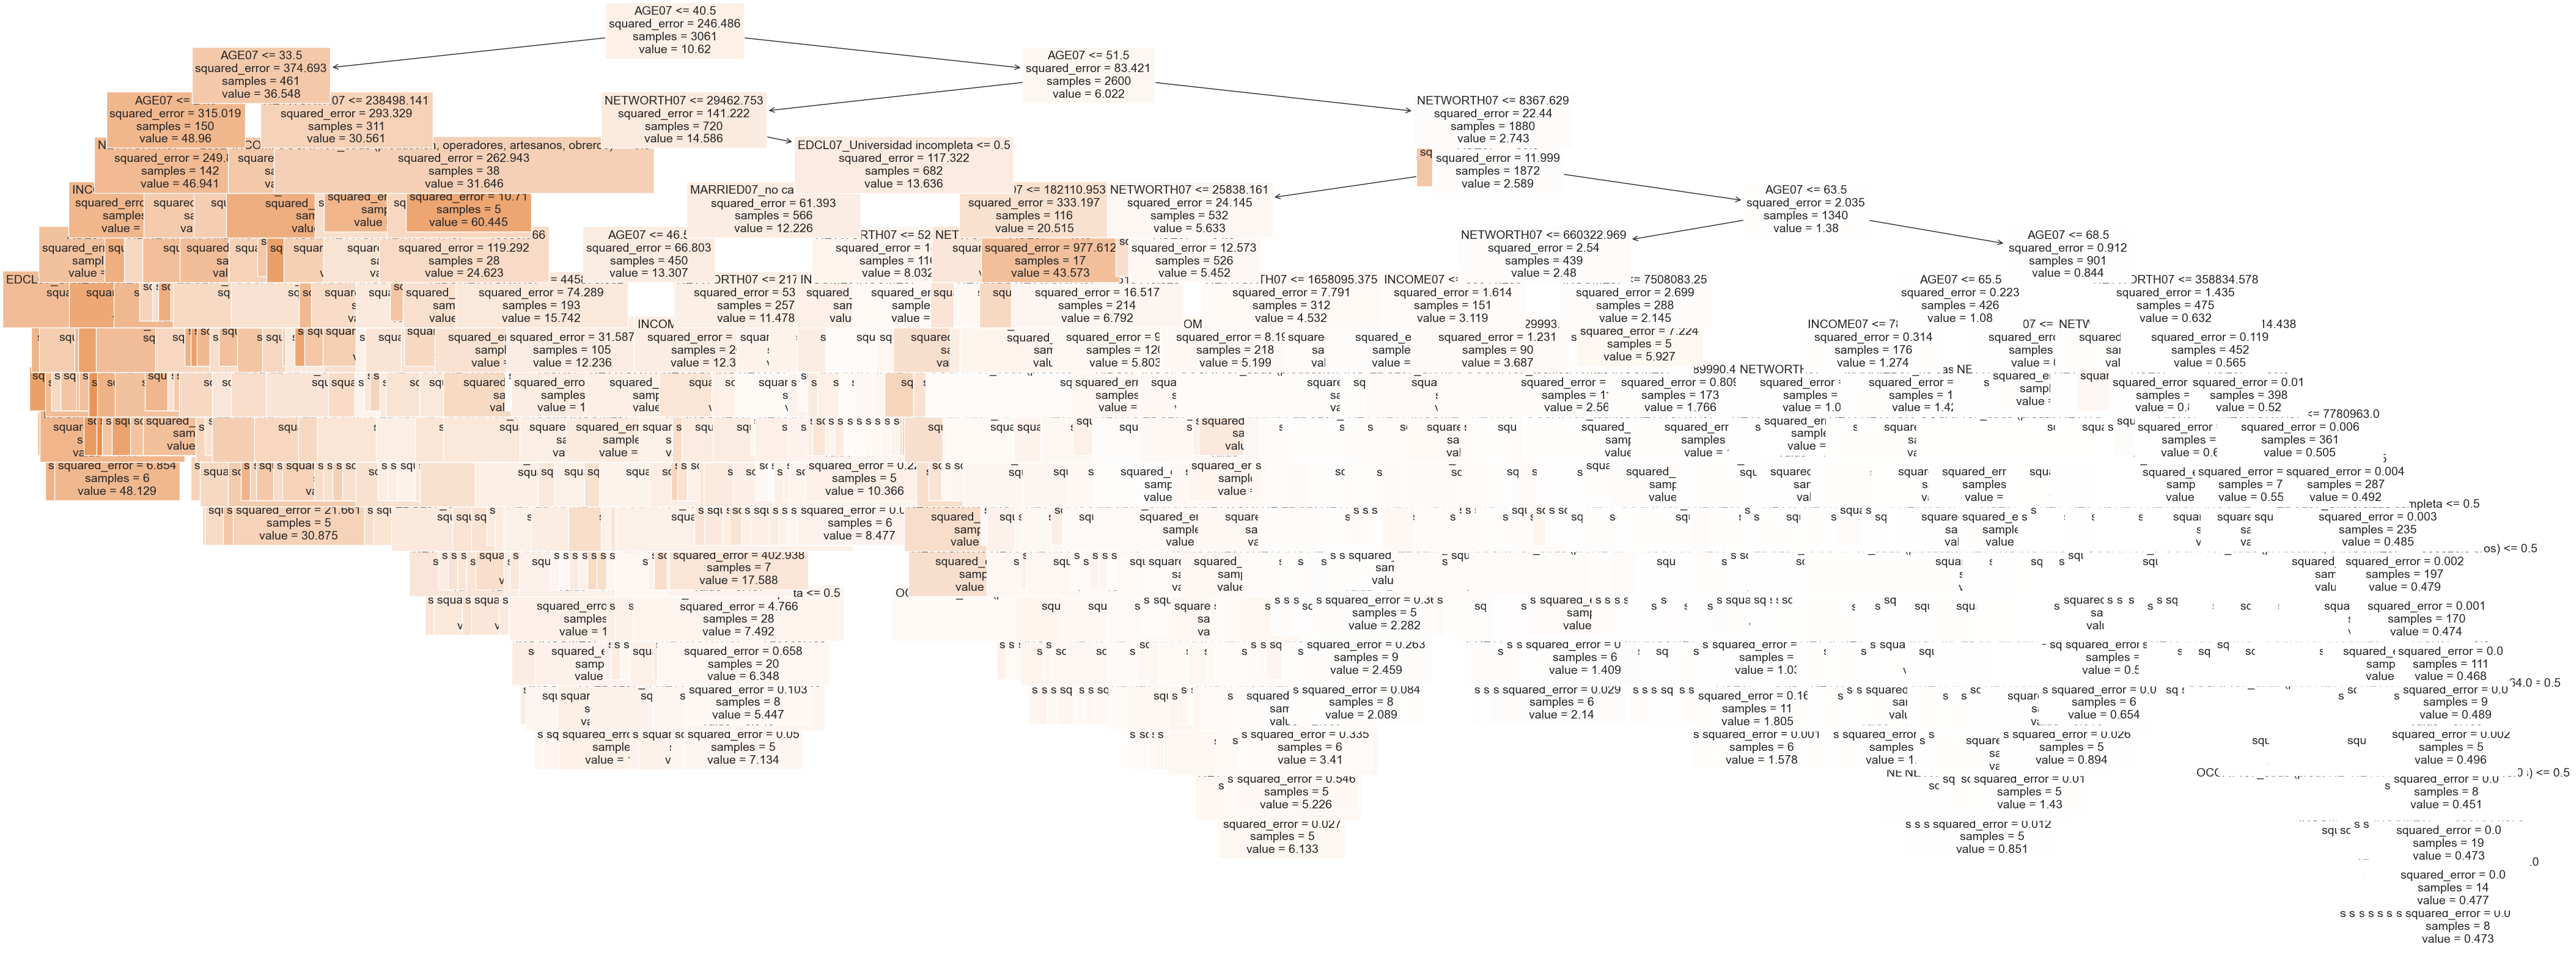

In [1056]:
#hago el plot del árbol
plt.figure(figsize=(50, 20))
plot_tree(dec_tree_sin_esc, filled=True,feature_names=X_train.columns,fontsize=14)
# Save the plot as an image
plt.savefig('decision_tree_plot.png', format='png', bbox_inches='tight', dpi=150)
plt.show()

### RANDOM FOREST

In [1062]:
random_forest =  RandomForestRegressor()

param_grids = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf':[ 5, 10]
}

grid_search_random_forest = GridSearchCV(
                                        random_forest, 
                                        param_grids, 
                                        cv=5, 
                                        scoring='neg_root_mean_squared_error'
                                        )

grid_search_random_forest.fit(X_train_scaled, y_train)

grid_search_random_forest.best_params_


{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [1064]:
rmse_modelos['random_forest']= -grid_search_random_forest.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464,
 'dec_tree': 7.091655100551941,
 'random_forest': 6.361915532229818}

En Random Forest puedo ver la importancia de las variables

Text(0, 0.5, '')

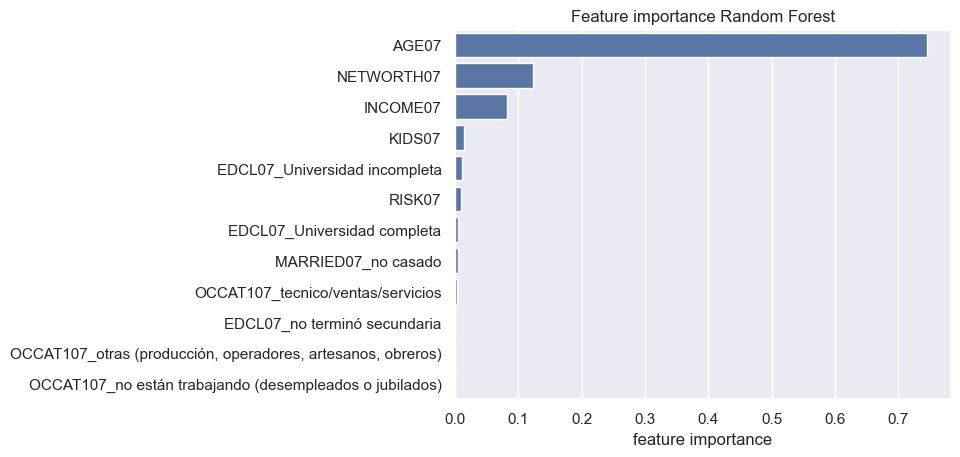

In [1115]:
#Veo la importancia
feature_importances = grid_search_random_forest.best_estimator_.feature_importances_

#Armo un dataframe con la feature importance
feature_importances = pd.DataFrame(feature_importances, columns=['feature importance'],index=X_train_scaled.columns)

#ordeno por feature importances de mayor a menor
feature_importances = feature_importances.sort_values('feature importance',ascending = False)

#hago gráfico
sns.barplot(
            data = feature_importances,
            x = 'feature importance',
            y=feature_importances.index,
            orient='h'
            )
plt.title("Feature importance Random Forest")
plt.ylabel("")

### Gradient Boosting

In [1120]:
gradient_boosting =  GradientBoostingRegressor()

param_grids = {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20],
                'min_samples_split': [ 5, 10],
                'min_samples_leaf':[ 5, 10],
                'learning_rate': [0.001,0.01, 0.1]
        
}

grid_search_gradient_boosting = GridSearchCV(
                                            gradient_boosting, 
                                            param_grids, 
                                            cv=5,
                                            scoring='neg_root_mean_squared_error'
                                            )

grid_search_gradient_boosting.fit(X_train_scaled, y_train)

grid_search_gradient_boosting.best_params_

{'learning_rate': 0.1,
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [1122]:
rmse_modelos['gradient_boosting']= -grid_search_gradient_boosting.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464,
 'dec_tree': 7.091655100551941,
 'random_forest': 6.361915532229818,
 'gradient_boosting': 5.1494239306512215}

Text(0, 0.5, '')

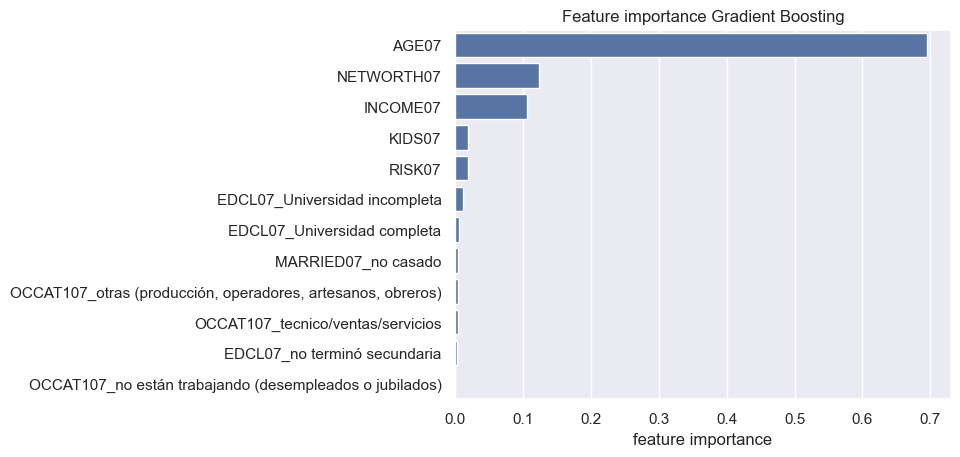

In [1136]:
##IMPORTANCIA
#Veo la importancia
feature_importances = grid_search_gradient_boosting.best_estimator_.feature_importances_

#Armo un dataframe con la feature importance
feature_importances = pd.DataFrame(feature_importances, columns=['feature importance'],index=X_train_scaled.columns)

#ordeno por feature importances de mayor a menor
feature_importances = feature_importances.sort_values('feature importance',ascending = False)

#hago gráfico
sns.barplot(
            data = feature_importances,
            x = 'feature importance',
            y=feature_importances.index,
            orient='h'
            )
plt.title("Feature importance Gradient Boosting")
plt.ylabel("")

### XGBOOST

In [1132]:
xgboost =  XGBRegressor()

param_grids = {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20],
                'learning_rate': [0.001,0.01, 0.1],
                'reg_alpha': [0.1, 1],       # Regularización Lasso o  L1
                'reg_lambda': [0.1, 1]     # Regularización Ridge o L2
        
}

grid_search_xgboost = GridSearchCV(
                                    xgboost, 
                                    param_grids, 
                                    cv=5,
                                    scoring='neg_root_mean_squared_error'
                                    )

grid_search_xgboost.fit(X_train_scaled, y_train)

grid_search_xgboost.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 1}

In [1134]:
rmse_modelos['XGBOOST']= -grid_search_xgboost.best_score_
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464,
 'dec_tree': 7.091655100551941,
 'random_forest': 6.361915532229818,
 'gradient_boosting': 5.1494239306512215,
 'XGBOOST': 4.933628961154729}

Text(0, 0.5, '')

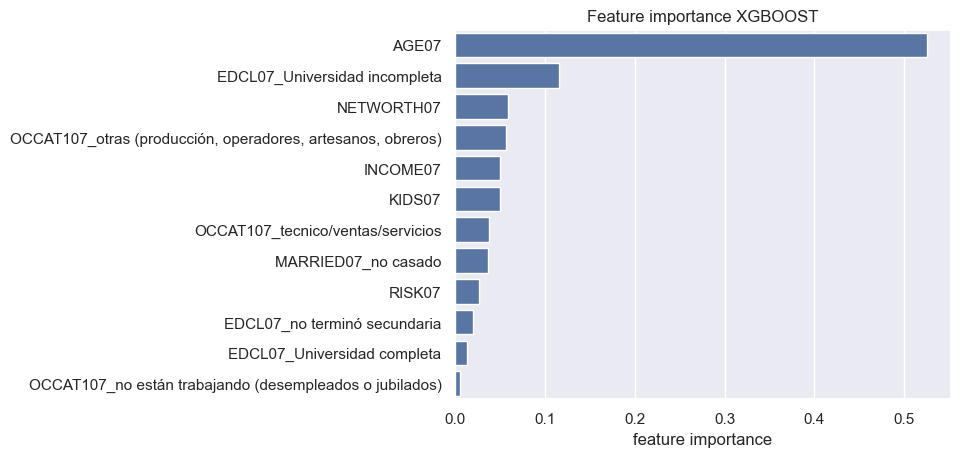

In [1138]:
##IMPORTANCIA
#Veo la importancia
feature_importances = grid_search_xgboost.best_estimator_.feature_importances_

#Armo un dataframe con la feature importance
feature_importances = pd.DataFrame(feature_importances, columns=['feature importance'],index=X_train_scaled.columns)

#ordeno por feature importances de mayor a menor
feature_importances = feature_importances.sort_values('feature importance',ascending = False)

#hago gráfico
sns.barplot(
            data = feature_importances,
            x = 'feature importance',
            y=feature_importances.index,
            orient='h'
            )

plt.title("Feature importance XGBOOST")
plt.ylabel("")

## 9) Comparación de diferentes modelos

In [1142]:
rmse_modelos

{'regresión lineal': 10.95105808095887,
 'LASSO': 10.953846023889803,
 'RIDGE': 10.95487925697701,
 'SVM': 10.179622942887052,
 'KNN': 7.334073859539464,
 'dec_tree': 7.091655100551941,
 'random_forest': 6.361915532229818,
 'gradient_boosting': 5.1494239306512215,
 'XGBOOST': 4.933628961154729}

El modelo que hemos encontrado que disminuye el RMSE es el XGBOOST, con 200 árboles, profundidad máxima de 10 de cada árbol, una tasa de aprendizaje del 10%, y una regularización Lasso y Ridge (Elastic Net) de 1. Resta probar este modelo en test.

In [1149]:
#calculo la predicción en test con el mejor estimador.
y_pred = grid_search_xgboost.best_estimator_.predict(X_test_scaled)

#Calculo rmse en test
rmse_func(y_test, y_pred)

5.150278928273298

El RMSE en test no parece significativamente distinto a lo que encontramos en training usando CV, y estamos hablando de 5 puntos porcentuales en un índice de 100, y habiendo castigado a los outliers (por elevar al cuadrado). Por lo tanto podemos asumir que es un buen modelo, pero debemos ver como se comporta cuando el modelo esté en producción.

## 10) Conclusiones y comunicación de resultados

Hemos visto que es posible predecir la verdadera tolerancia al riesgo de los inversores razonablemente, y que el modelo que minimizza el error es el XGBoost, el cual también permite identificar la importancia de las variables. En ese sentido parecería que la edad es determinante para poder predecir la el perfil de riesgo, así como la educación, el patrimonio, neto, si se trata de trabajadores obreros y también el ingreso. En el caso del XGBoost, al igual que en Random Forest y Gradient Boosting solo sabemos la importancia de las variables según como contribuyen a la pureza de los nodos, pero no nos informan si tienen un efecto positivo o negativo sobre la variable a predecir.

Posteriormente, se puede hacer un deploy del modelo, incorporándolo a una app donde, ingresando las características del inversor, se pueda predecir el perfil de riesgo del mismo (el índice). Con este índice de tolerancia al riesgo, se puede automatizar la selección el portafolio óptimo de activos para ese nivel de riesgo usando el modelo de Markowitz por ejemplo.